# Basic Tutorial: `MergeTree` class

This notebook walks through the basic functionality of the `MergeTree` class.

In [1]:
from cereeberus import MergeTree
from cereeberus.data.ex_mergetrees import randomMergeTree

A merge tree is a tree with a function for which any vertex (with the exception of the root) has exactly one neighbor of higher function value. The root, which is this module is always called `v_inf`, has function value $\infty$, given by `np.inf`. We will run this module by working with a random merge tree. Currently, this drawing will show the names on each node. 

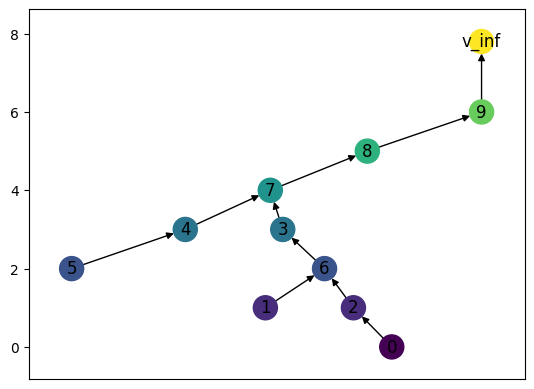

In [2]:
MT = randomMergeTree(10,  seed = 21)
MT.draw()

We can get the list of leaves as well as find the least common ancestor of any pair of vertices. 

In [3]:
print(f"The leaves are {MT.get_leaves()}.")
print(f"The LCA of vertices 5 and 6 is vertex {MT.LCA(5,6)}.")
print(f"The LCA of vertices 0 and 1 is vertex {MT.LCA(0,1)}.")

The leaves are [5, 1, 0].
The LCA of vertices 5 and 6 is vertex 7.
The LCA of vertices 0 and 1 is vertex 6.


The merge trees inherit much of the structure from the `ReebGraph` class. One important addition in the merge tree is the ability to work with labels. This is stored as a dictionary in the class, where `MT.labels[key] = vertex`. Here, we'll give automatic labels to all the leaves of the tree, and add in a few more for good measure. Note that if we add a label to an edge at a function value, we will subdivide the edge to add a vertex before giving it a label. 

{0: 5, 1: 1, 2: 0, 3: 6, 37: 'hen'}


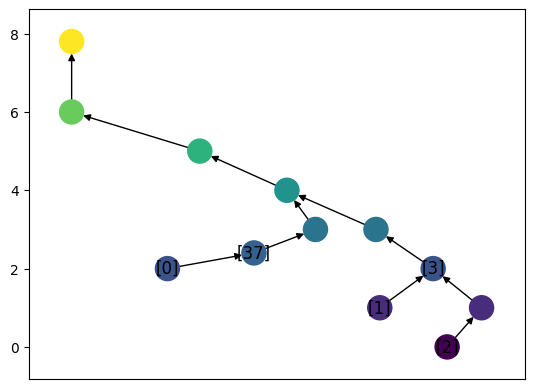

In [4]:
MT.label_all_leaves()
MT.add_label(vertex = 6, label = None)
MT.add_label_edge(u=5, v= 4, w = 'hen', f_w = 2.4, label = 37)
print(MT.labels)

MT.draw(with_labels = True, label_type="labels")

## Old stuff down here, to be deleted....

You can also create random merge trees and plot them

In [ ]:
from cereeberus.data.randomMergeTrees import randomMerge
from cereeberus.reeb.merge import mergeTree
R = randomMerge(10)
M = mergeTree(R.G, R.fx)
M.plot_reeb()

#### You can also check if a graph is a merge tree.

This works for both Reeb graphs and Networkx graphs, and it part of the Merge function already

In [ ]:
from cereeberus.compute.merge import isMerge
### Reeb Graph
isMerge(R,R.fx)


In [ ]:
### Networkx Graph
isMerge(R.G,R.fx)

#### To compute a merge tree from a Reeb Graph, we need to first identify any isolates in the graph (nodes with degree 0) and remove them as they will not be going into the merge tree.  Looking at a Reeb graph with isolates:

In [ ]:
jm = reeb.juggling_man()
jm.plot_reeb()

#### Then we can remove isolates and plot

In [ ]:
jm_im = degree.remove_isolates(jm)
jm_im.plot_reeb()

We then import the `computemergetree` function, and provide a filtration.

In [ ]:
from cereeberus.compute.merge import computeMergeTree

In [ ]:
cmt = computeMergeTree(jm_im, verbose=False, precision=1, filter=False)
cmt.plot_reeb()
cmt.fx

We can also compute distances between networkx graphs, reeb graphs, and merge trees.  The first example is the graph edit distance, compliments of the networkx package implementation.

In [ ]:
from cereeberus.compute import distance
distance.edit(cmt, jm_im)